# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

 Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url + city)
    
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    
# Indicate that Data Loading is complete 
print("-----------------------------")
#print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bengkulu
Processing Record 2 of Set 1 | geraldton
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | xining
Processing Record 7 of Set 1 | togul
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | belaya gora
Processing Record 13 of Set 1 | mutum
Processing Record 14 of Set 1 | starosubkhangulovo
Processing Record 15 of Set 1 | talara
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | lumby
Processing Record 18 of Set 1 | pedregal
Processing Record 19 of Set 1 | belen
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | bluff
Processing Record 23 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bengkulu,-3.8004,102.2655,23.96,91,99,1.53,ID,1680447655
1,geraldton,-28.7667,114.6000,22.23,83,10,4.12,AU,1680447846
2,hobart,-42.8794,147.3294,12.81,80,75,3.09,AU,1680447654
3,port alfred,-33.5906,26.8910,22.32,89,48,1.34,ZA,1680447846
4,tuktoyaktuk,69.4541,-133.0374,-27.00,76,0,4.63,CA,1680447846


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bengkulu,-3.8004,102.2655,23.96,91,99,1.53,ID,1680447655
1,geraldton,-28.7667,114.6000,22.23,83,10,4.12,AU,1680447846
2,hobart,-42.8794,147.3294,12.81,80,75,3.09,AU,1680447654
3,port alfred,-33.5906,26.8910,22.32,89,48,1.34,ZA,1680447846
4,tuktoyaktuk,69.4541,-133.0374,-27.00,76,0,4.63,CA,1680447846


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

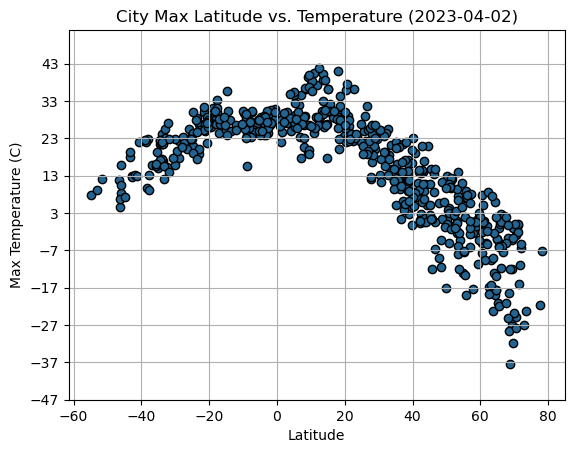

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color = '#236592', edgecolors = 'black')

# Incorporate the other graph properties
ylim_bottom = round(city_data_df['Max Temp'].min() - 10)
ylim_top = round(city_data_df['Max Temp'].max() + 10)

plt.yticks(np.arange(ylim_bottom, ylim_top, 10))

plt.ylim(ylim_bottom, ylim_top)

# Create a title, x label, and y label for our chart
dt = time.strftime("%Y-%m-%d",
             time.gmtime(city_data_df.iloc[0]['Date']))
plt.title(f"City Max Latitude vs. Temperature ({dt})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

plt.grid()


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

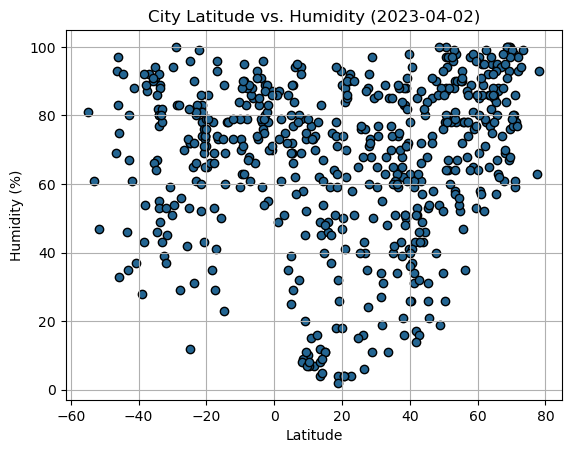

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color = '#236592', edgecolors = 'black')

# Create a title, x label, and y label for our chart
dt = time.strftime("%Y-%m-%d",
             time.gmtime(city_data_df.iloc[0]['Date']))
plt.title(f"City Latitude vs. Humidity ({dt})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

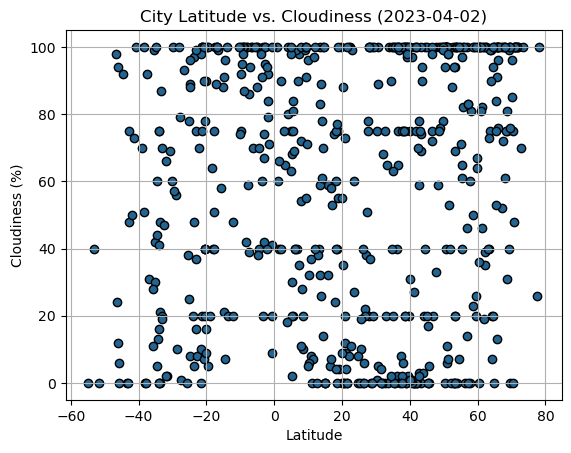

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color = '#236592', edgecolors = 'black')

# Incorporate the other graph properties
dt = time.strftime("%Y-%m-%d",
             time.gmtime(city_data_df.iloc[0]['Date']))
plt.title(f"City Latitude vs. Cloudiness ({dt})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

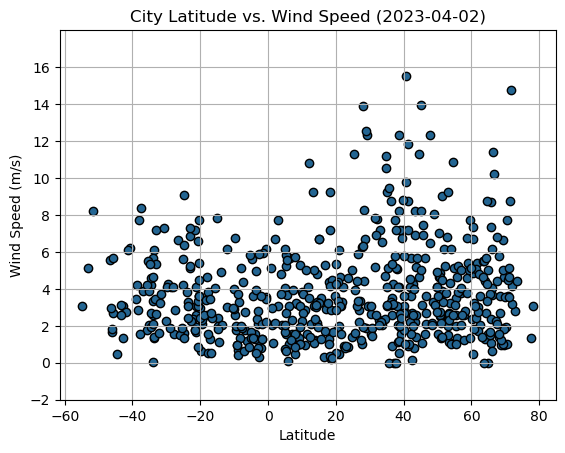

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color = '#236592', edgecolors = 'black')

# Incorporate the other graph properties
ylim_bottom = round(city_data_df['Wind Speed'].min() - 2)
ylim_top = round(city_data_df['Wind Speed'].max() + 2)

plt.yticks(np.arange(ylim_bottom, ylim_top, 2))

plt.ylim(ylim_bottom, ylim_top)

dt = time.strftime("%Y-%m-%d",
             time.gmtime(city_data_df.iloc[0]['Date']))
plt.title(f"City Latitude vs. Wind Speed ({dt})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.grid()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def CreateLinearRegressionPlot(x, y, xlabel, ylabel, textposition_x, textposition_y):
    lrm = linregress(x, y)

    print(f'The r-value is: {lrm.rvalue}')

    plt.scatter(x, y)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.tick_params(axis='both', which='major', labelsize=8)

    plt.plot(x, lrm.slope * x + lrm.intercept, color='red')

    plt.text(textposition_x, textposition_y, f"y = {round(lrm.slope, 2)}x + {round(lrm.intercept, 2)}", fontsize="15", color="red")

    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,tuktoyaktuk,69.4541,-133.0374,-27.00,76,0,4.63,CA,1680447846
5,xining,36.6167,101.7667,1.30,64,100,3.51,CN,1680447760
6,togul,53.4650,85.9128,-7.85,90,100,1.12,RU,1680447847
7,yellowknife,62.4560,-114.3525,-16.71,78,100,3.60,CA,1680447847
10,belaya gora,68.5333,146.4167,-28.63,100,75,2.68,RU,1680447848


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bengkulu,-3.8004,102.2655,23.96,91,99,1.53,ID,1680447655
1,geraldton,-28.7667,114.6000,22.23,83,10,4.12,AU,1680447846
2,hobart,-42.8794,147.3294,12.81,80,75,3.09,AU,1680447654
3,port alfred,-33.5906,26.8910,22.32,89,48,1.34,ZA,1680447846
8,hermanus,-34.4187,19.2345,21.56,82,13,4.19,ZA,1680447847


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8859949707133328


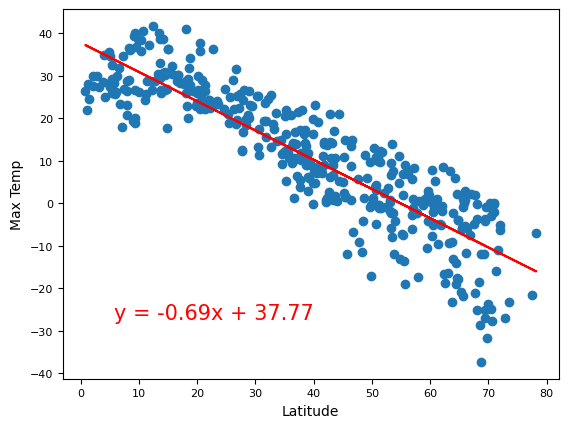

In [20]:
# Linear regression on Northern Hemisphere
x, y = northern_hemi_df['Lat'], northern_hemi_df['Max Temp']

CreateLinearRegressionPlot(x, y, "Latitude", "Max Temp", x.min() + 5, y.min() + 10)

The r-value is: 0.7670348790290351


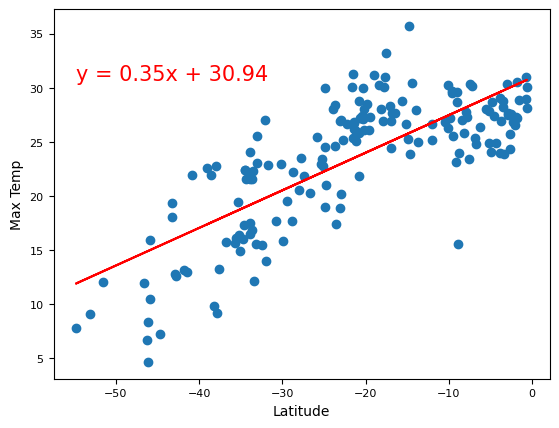

In [ ]:
# Linear regression on Southern Hemisphere
x, y = southern_hemi_df['Lat'], southern_hemi_df['Max Temp']

CreateLinearRegressionPlot(x, y, "Latitude", "Max Temp",x.min(), y.max() - 5)

**Discussion about the linear relationship:** From the plots above we can see a direct linear relationship between Latitude and Maximum Temprature. 
Maximum temperature decreases as Latitude increases (you move further away from the Equator). R-value for northern and souther hemisphere is -0.89 and 0.77 respectively. Both values indicate strong relation between the variables.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4006034221323663


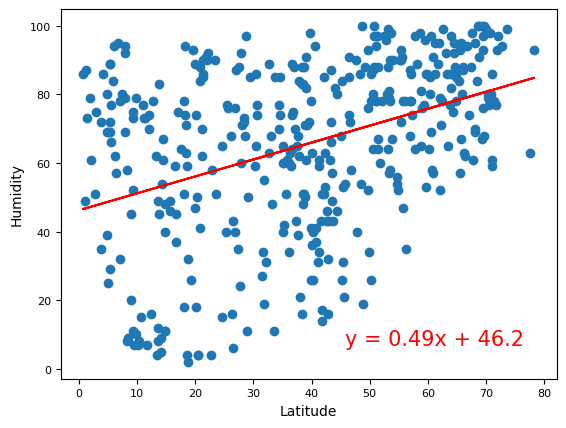

In [22]:
# Northern Hemisphere
x, y = northern_hemi_df['Lat'], northern_hemi_df['Humidity']

CreateLinearRegressionPlot(x, y, "Latitude", "Humidity", x.min() + 45, y.min() + 5)

The r-value is: 0.1878310967997064


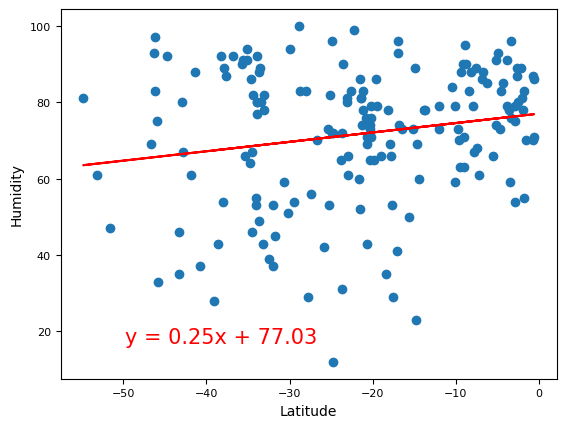

In [23]:
# Southern Hemisphere
x, y = southern_hemi_df['Lat'], southern_hemi_df['Humidity']

CreateLinearRegressionPlot(x, y, "Latitude", "Humidity", x.min() + 5, y.min() + 5)

**Discussion about the linear relationship:** From the plots above we can see a linear relationship does not exist between Latitude and Humidity. 
R-value for northern and souther hemisphere is -0.40 and 0.19 respectively. Both values indicates weak relation between the variables.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.21028103992238875


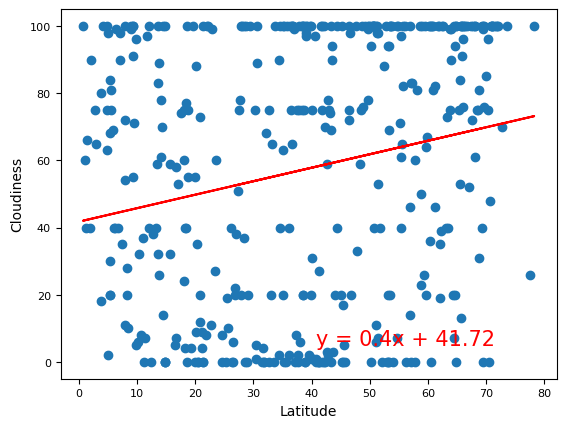

In [24]:
# Northern Hemisphere
x, y = northern_hemi_df['Lat'], northern_hemi_df['Cloudiness']

CreateLinearRegressionPlot(x, y, "Latitude", "Cloudiness", x.min() + 40, y.min() + 5)

The r-value is: 0.37079668013055933


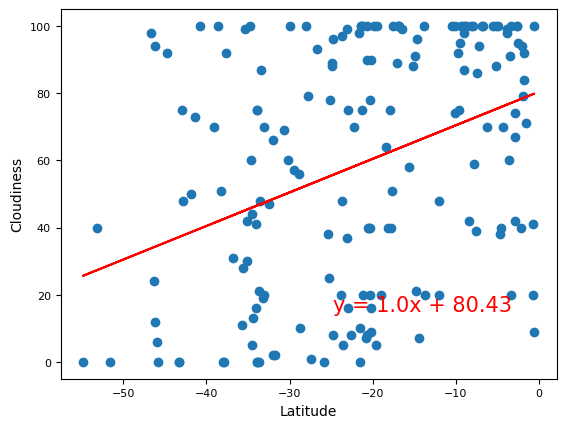

In [25]:
# Southern Hemisphere
x, y = southern_hemi_df['Lat'], southern_hemi_df['Cloudiness']

CreateLinearRegressionPlot(x, y, "Latitude", "Cloudiness", x.min() + 30, y.min() + 15)

**Discussion about the linear relationship:** From the plots above we can see a linear relationship does not exist between Latitude and Cloudiness. 
R-value for northern and souther hemisphere is 0.21 and 0.37 respectively. Both values indicates weak relation between the variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09592968845064122


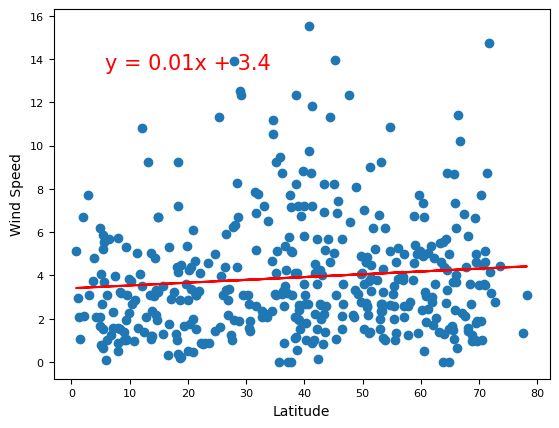

In [26]:
# Northern Hemisphere
x, y = northern_hemi_df['Lat'], northern_hemi_df['Wind Speed']

CreateLinearRegressionPlot(x, y, "Latitude", "Wind Speed", x.min() + 5, y.max() - 2)

The r-value is: -0.231657482445076


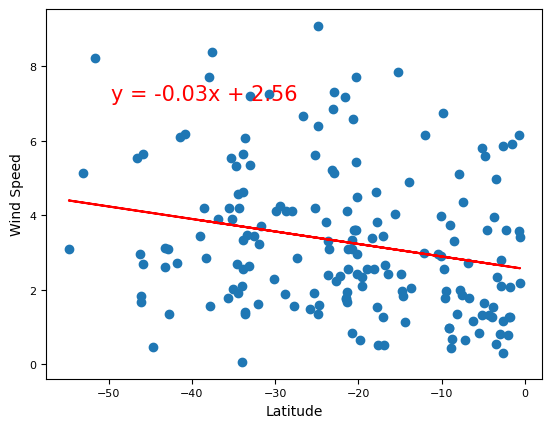

In [28]:
# Southern Hemisphere
x, y = southern_hemi_df['Lat'], southern_hemi_df['Wind Speed']

CreateLinearRegressionPlot(x, y, "Latitude", "Wind Speed", x.min() + 5, y.max() - 2)

**Discussion about the linear relationship:** From the plots above we can see a linear relationship does not exist between Latitude and Wind Speed. 
R-value for northern and souther hemisphere is 0.09 and -0.23 respectively. Both values indicates weak relation between the variables.